# Adversarial Search
Adversarial search is a search, where we examine the problem which arises when we try to plan ahead of the world and other agents are planning against us. Adversarial search is search when there is an "enemy" or "opponent" changing the state of the problem every step in a direction you do not want.
- Multi-agent environment: 
  - any given agent needs to consider the actions
    of other agents and how they affect its own
    welfare
  - introduce possible contingencies into the
    agent’s problem-solving process
  - cooperative vs. competitive
- Adversarial search problems: 
  - agents have conflicting goals -- games


This can be modeled as where there is a single utility which one agent (the maximizing agent) is trying minimize and the other agent (the minimizing agent) is trying to minimize.

A game can be formally defined as a kind of search problem with the following elements:
- <b>S0:</b> The initial state, which specifies how the game is set up at the start.
- <b>PLAYER(s):</b> Defines which player has the move in a state.
- <b>ACTIONS(s):</b> Returns the set of legal moves in a state.
- <b>RESULT(s, a):</b> The transition model, which defines the result of a move.
- <b>TERMINAL-TEST(s):</b> A terminal test, which is true when the game is over and false otherwise. States where the game has ended are called terminal states.
- <b>UTILITY(s, p):</b> A utility function (also called an objective function or payoff function), defines the final numeric value for a game that ends in terminal state s for a player p. A zero-sum game is (confusingly) defined as one where the total payoff to all players is the same for every instance of the game.


There are two types of algorithms that falls under the adversarial search.
- Minimax Algorithm
- Alpha-Beta Pruning

## Minimax Algorithm
The minimax algorithm computes the minimax decision from the current state. It uses a simple recursive computation of the minimax values of each successor state, directly implementing the defining equations. The recursion proceeds all the way down to the leaves of the tree, and then the minimax values are backed up through the tree as the recursion unwinds. The minimax algorithm performs a complete depth-first exploration of the game tree.

<b>Algorithm</b>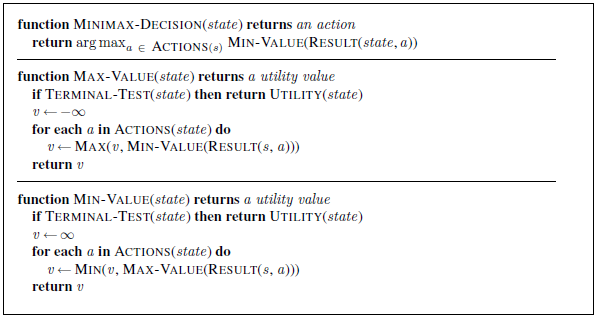

In Minimax the two players are called maximizer and minimizer. The maximizer tries to get the highest score possible while the minimizer tries to do the opposite and get the lowest score possible.

In [3]:
# D for Depth
# I for Index
# T for Turn
# S for Score
# T_D for Target_Depth
import math
# 1ST Call(0,0,True, [-1,8,-3,-1,2,1,-3,4],3)
# 2ND Call(1,0,False,[-1,8,-3,-1,2,1,-3,4],3)
# 3RD Call((1,1,False,[-1,8,-3,-1,2,1,-3,4],3))
def MINIMAX_ALGO(D,I,T,S,T_D):
    # base case : targetDepth reached 
    #(0==3)
    if (D == T_D):  
        return S[I]
    if (T):
        return max(MINIMAX_ALGO(D + 1,I*2,False,S,T_D),MINIMAX_ALGO(D + 1,I*2+1,False,S,T_D))
    #max((1,0,False,[-1,8,-3,-1,2,1,-3,4],3)(1,1,False,[-1,8,-3,-1,2,1,-3,4],3))
    #max([S[0],S[1]),max(S[2],S[3]),max(S[4],S[5]),max(S[6],S[7])
    else: 
        return min(MINIMAX_ALGO(D + 1,I*2,True,S,T_D),MINIMAX_ALGO(D + 1,I*2+1,True,S,T_D))
        #max((1,0,True,[-1,8,-3,-1,2,1,-3,4],3),(1,1,True,[-1,8,-3,-1,2,1,-3,4],3))
# Driver code 
Utility_Values = [-1,8,-3,-1,2,1,-3,4]
Tree_Depth = math.log(len(Utility_Values), 2) 
print("Tree Depth: ",Tree_Depth)
print("The Optimal Value is : ", end = "") 
print(MINIMAX_ALGO(0,0,True,Utility_Values,Tree_Depth)) 

Tree Depth:  3.0
The Optimal Value is : 2


### Question 1:
Find the winning value of the Maximizer (Node A).
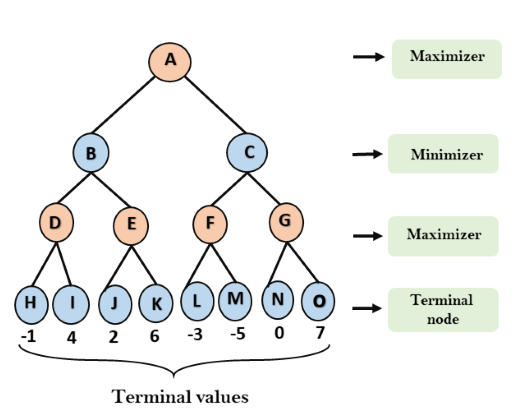

In [ ]:
#Implement Minimax Algorithm only for the winning value.

import math
def MINIMAX_ALGO(D,I,T,S,T_D):
    # base case : targetDepth reached 
    #(0==3)
    if (D == T_D):  
        return S[I]
    if (T):
        return max(MINIMAX_ALGO(D + 1,I*2,False,S,T_D),MINIMAX_ALGO(D + 1,I*2+1,False,S,T_D))
    else: 
        return min(MINIMAX_ALGO(D + 1,I*2,True,S,T_D),MINIMAX_ALGO(D + 1,I*2+1,True,S,T_D))
# Driver code 
Utility_Values = [-1,4,2,6,-3,-5,0,7]
Tree_Depth = math.log(len(Utility_Values), 2) 


print("Tree Depth: ",Tree_Depth)


print("\n--------Starting Node As MAX-------")
print("The Optimal Value is : ", end = "") 
print(MINIMAX_ALGO(0,0,True,Utility_Values,Tree_Depth)) 


print("\n--------Starting Node As MIN-------")
print("The Optimal Value is : ", end = "") 
print(MINIMAX_ALGO(0,0,False,Utility_Values,Tree_Depth))

### Question 2:
Find the winning value of the maximizer along with the path.
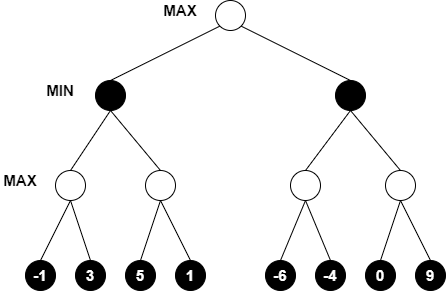

In [ ]:
#Implement Minimax Algorithm that print paths to wining/optimal value.

import math
def MINIMAX_ALGO(D,I,T,S,T_D,Path,node_no):
    nodeNoCh="N"+str(node_no)
    Path.append(nodeNoCh)
    if (D == T_D):
        return S[I]
    
    p1=[]
    p2=[]
    if (T):
        v1=MINIMAX_ALGO(D + 1,I*2,False,S,T_D,p1,node_no*2)
        v2=MINIMAX_ALGO(D + 1,I*2+1,False,S,T_D,p2,node_no*2+1)
        
        if v1>=v2:
            Path.extend(p1)
            return v1
        else:
            Path.extend(p2)
            return v2
    else:
        v1=MINIMAX_ALGO(D + 1,I*2,True,S,T_D,p1,node_no*2)
        v2=MINIMAX_ALGO(D + 1,I*2+1,True,S,T_D,p2,node_no*2+1)
        
        if v1<=v2:
            Path.extend(p1)
            return v1
        else:
            Path.extend(p2)
            return v2
# Driver code 
Utility_Values = [-1,3,5,1,-6,-4,0,9]
Tree_Depth = math.log(len(Utility_Values), 2) 
Path=[]
print("Tree Depth: ",Tree_Depth)
print("The Optimal Value is : ", end = "") 
print(MINIMAX_ALGO(0,0,True,Utility_Values,Tree_Depth,Path,1)) 
print("Path: "+str(Path))

### Question 3:
Find the winning value of the maximizer along with the path.
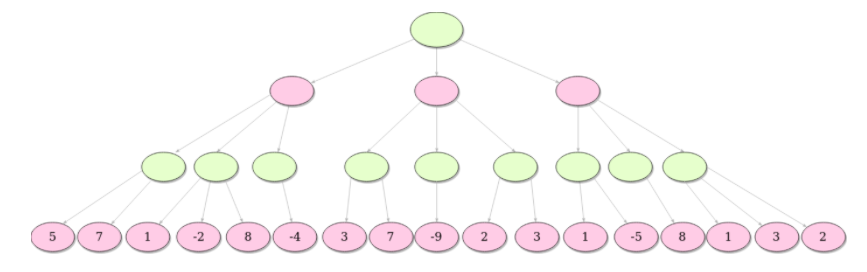

In [ ]:
#Implement Minimax Algorithm that print paths to wining/optimal value.